Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 


Data Loading

In [2]:
dataset = pd.read_csv('seattle-weather.csv')

dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Exploratory Data Analysis - Deskripsi Variabel

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
dataset.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [14]:
precipitation = (dataset.precipitation == 0).sum()
print(f'Jumlah Volume yang bernilai 0 adalah {precipitation}')

precipitation_total = dataset['precipitation'].count()
print(f'Total data dari column precipitation {precipitation_total}')

selisih = precipitation_total - precipitation
print(f'Selish antara total data precipitation dengan precipitaion dengan value 0 sebesar {selisih}')

Jumlah Volume yang bernilai 0 adalah 838
Total data dari column precipitation 1461
Selish antara total data precipitation dengan precipitaion dengan value 0 sebesar 623


In [6]:
dataset.loc[(dataset['Volume'] == 0)]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
111506,N100,2017-09-12,1013.900024,1017.969971,1012.559998,1016.080017,1016.080017,0.0
111507,N100,2017-09-13,1014.929993,1020.059998,1014.270020,1018.270020,1018.270020,0.0
111508,N100,2017-09-14,1016.489990,1021.260010,1016.260010,1019.940002,1019.940002,0.0
111509,N100,2017-09-15,1018.650024,1020.419983,1014.580017,1016.049988,1016.049988,0.0


In [7]:
dataset = dataset.loc[(dataset[['Volume']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
dataset.shape

(70364, 8)

<Axes: xlabel='Open'>

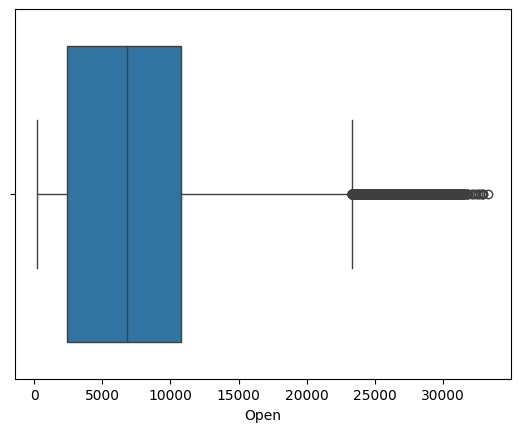

In [8]:
sns.boxplot(x=dataset['Open'])

<Axes: >

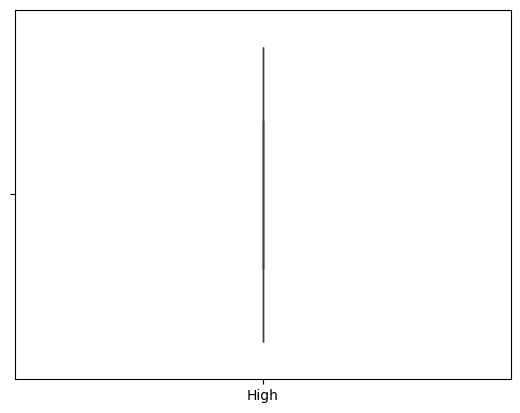

In [9]:
sns.boxplot(x=['High'])

<Axes: xlabel='Low'>

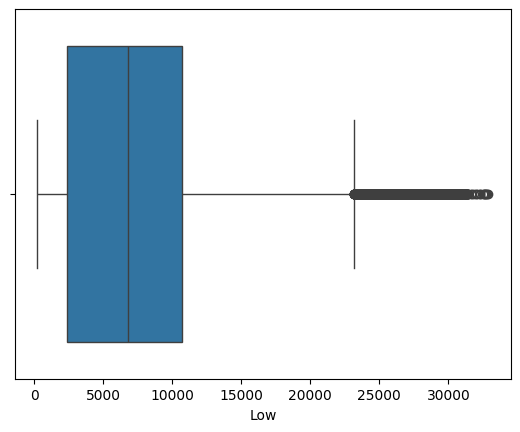

In [10]:
sns.boxplot(x=dataset['Low'])

<Axes: xlabel='Close'>

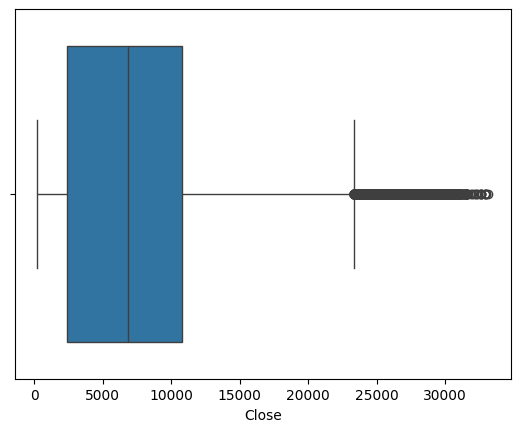

In [11]:
sns.boxplot(x=dataset['Close'])

<Axes: xlabel='Adj Close'>

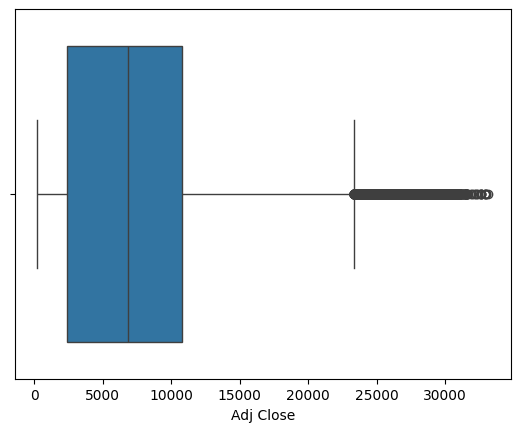

In [12]:
sns.boxplot(x=dataset['Adj Close'])

<Axes: xlabel='Volume'>

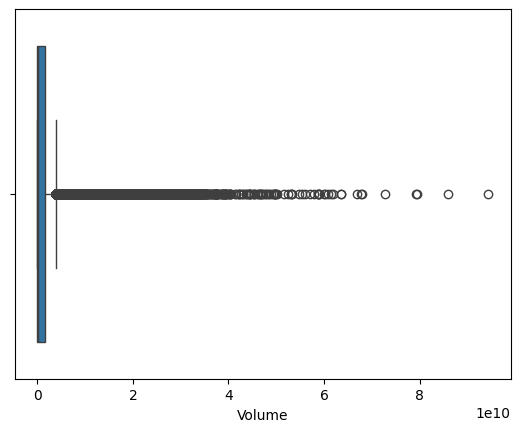

In [13]:
sns.boxplot(x=dataset['Volume'])

In [14]:
numeric_cols = dataset.select_dtypes(include='number').columns #menggunakan select_dtypes untuk memilih kolom numerikal dan menggunakan .columns untuk menyimpan nama kolom
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = dataset[numeric_cols].quantile(0.25)
Q3 = dataset[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((dataset[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (dataset[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
diamonds = dataset[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
diamonds.shape

(60684, 8)

Setelah Outlier Dihapus

<Axes: xlabel='Open'>

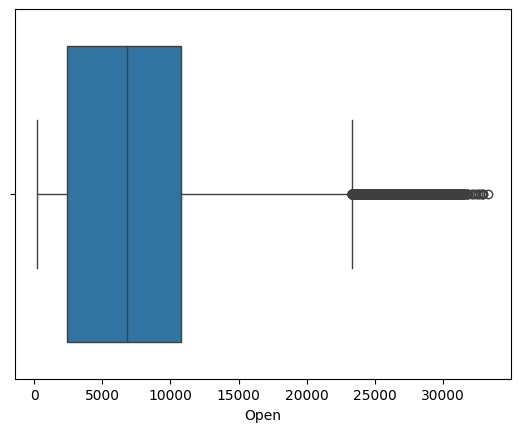

In [15]:
sns.boxplot(x=dataset['Open'])

<Axes: xlabel='Low'>

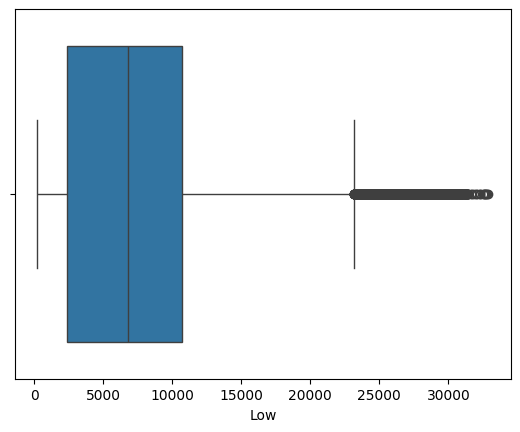

In [16]:
sns.boxplot(x=dataset['Low'])

<Axes: xlabel='High'>

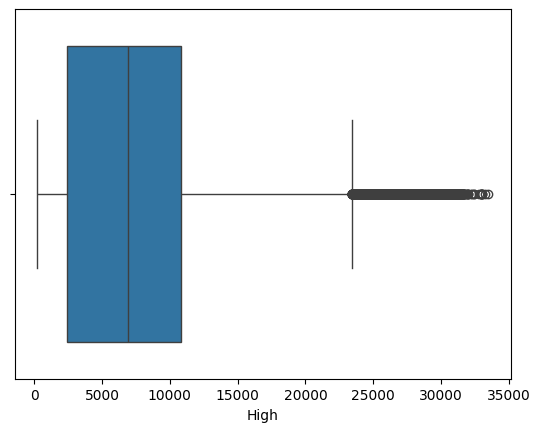

In [17]:
sns.boxplot(x=dataset['High'])

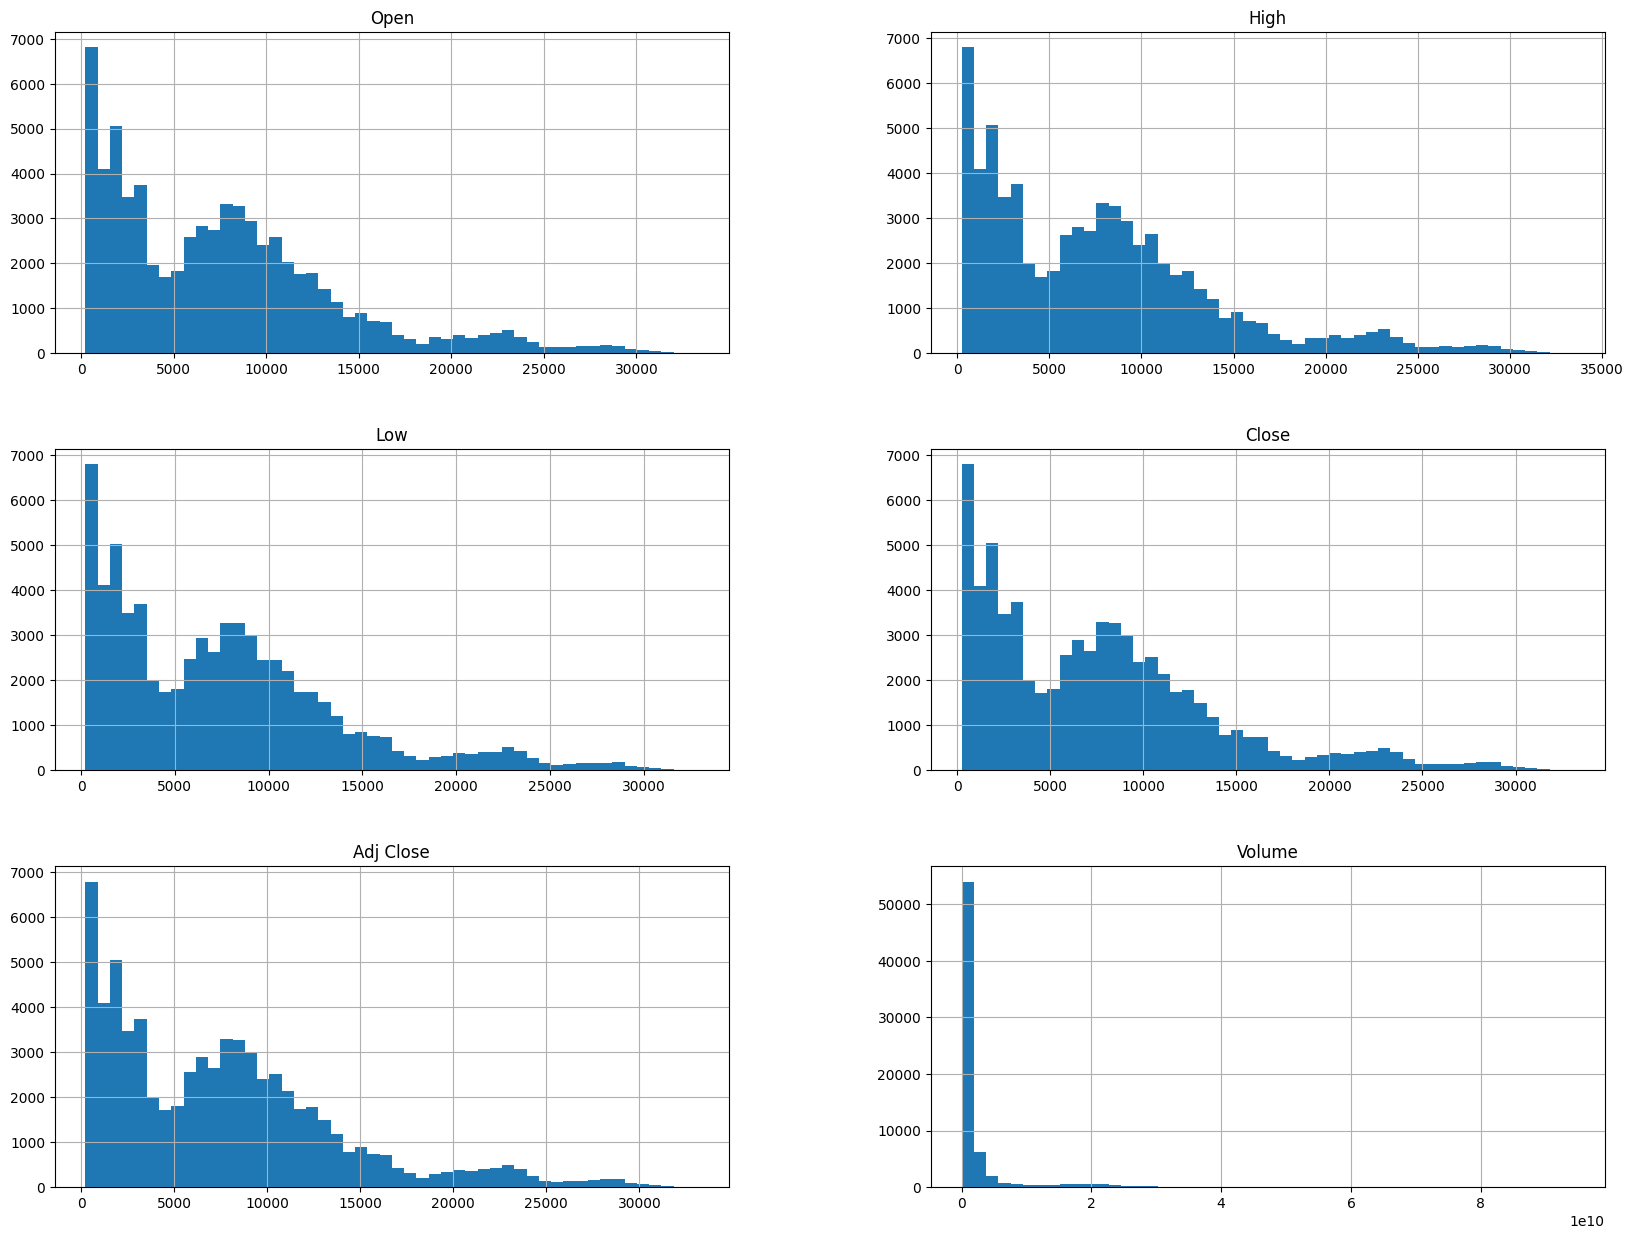

In [18]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

Multivariate

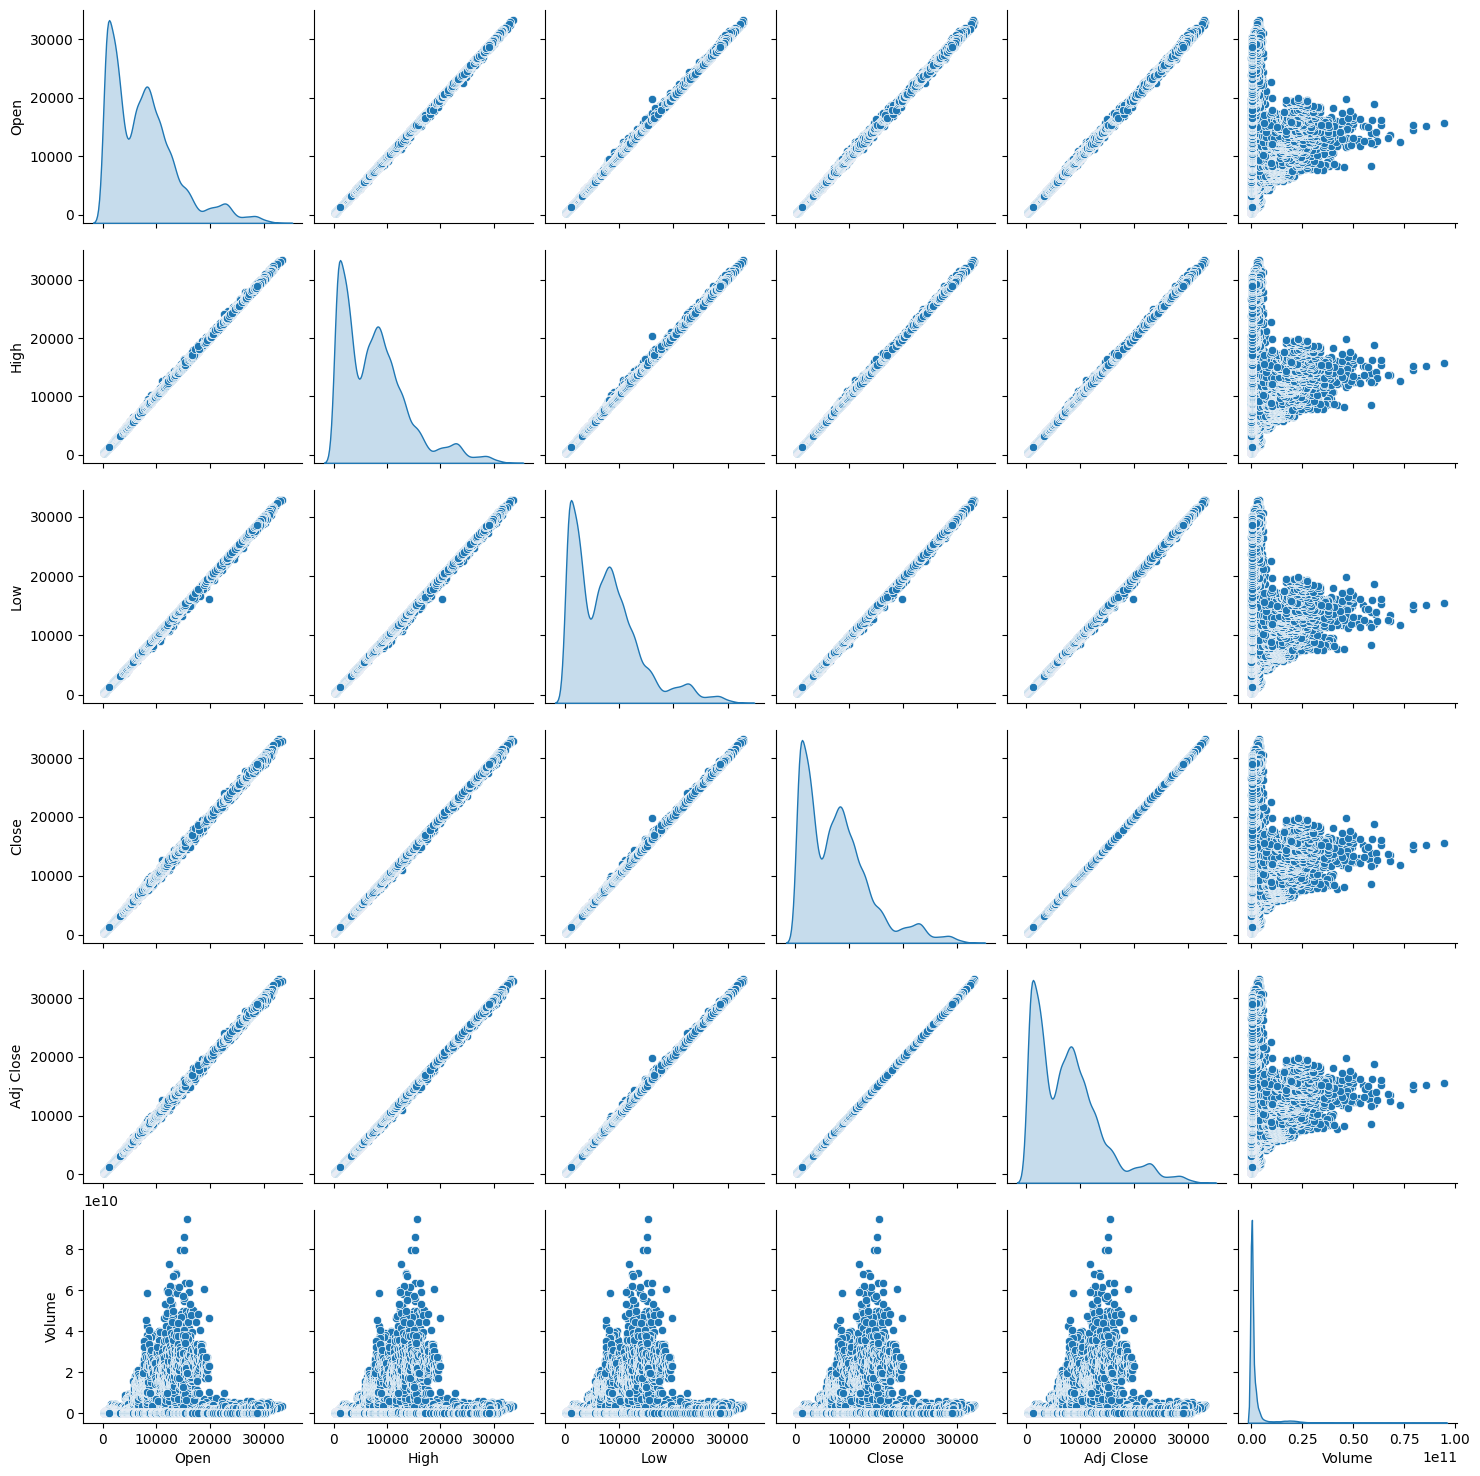

In [19]:
sns.pairplot(dataset, diag_kind = 'kde')

In [20]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

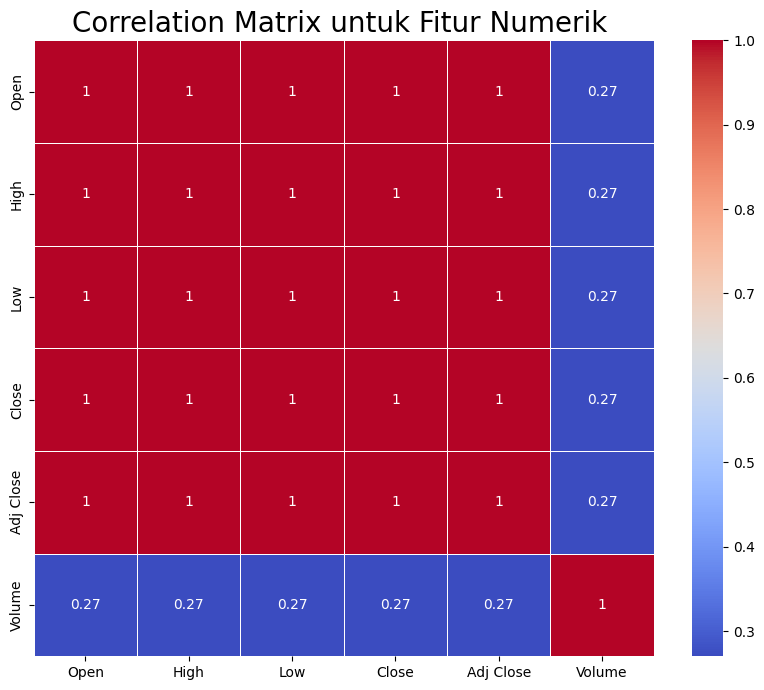

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [24]:
dataset = dataset[['Open', 'High', 'Low', 'Close', 'Adj Close']].fillna(method='ffill')


C:\Users\louis\AppData\Local\Temp\ipykernel_14304\383093144.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset = dataset[['Open', 'High', 'Low', 'Close', 'Adj Close']].fillna(method='ffill')


Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=123)
pca.fit(dataset[['Open','High','Low','Close','Adj Close']])
princ_comp = pca.transform(dataset[['Open','High','Low','Close','Adj Close']])
pca.explained_variance_ratio_.round(3) #menampilkan rasio variansi dari setiap komponen utama

array([1., 0., 0., 0., 0.])

In [26]:
pca = PCA(n_components=1, random_state=123)
pca.fit(dataset[['Open','High','Low','Close','Adj Close']])
dataset['stock'] = pca.transform(diamonds.loc[:, ('Open','High','Low','Close','Adj Close')]).flatten()
dataset.drop(['Open','High','Low','Close','Adj Close'], axis=1 ,inplace =True)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values